In [8]:
# ----------------------------------------------------------------------
# Chi-Square Test : Weekends vs Weekdays

import pandas as pd
from scipy.stats import chi2_contingency

In [17]:
df = pd.read_csv(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data.csv')

# categorizing 'overall_score' based on Fitbit guidelines 
def categorize_score(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 80:
        return 'Good'
    elif score >= 60:
        return 'Fair'
    else:
        return 'Poor'

# apply the categorization function to the 'overall_score'
df['sleep_quality_category'] = df['overall_score'].apply(categorize_score)

# column created to distinguish between weekdays and weekends
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5,6] else 'Weekday')

# create the contingency table
# ...it counts how many times each sleep quality category occurs on weekdays and weekends.
contingency_table = pd.crosstab(df['sleep_quality_category'], df['day_type'])

# perform the Chi-Square Test
# ...this test assesses whether there's a significant association between the day type and the sleep quality category.
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print the results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# define the row and column headers
row_headers = ['Excellent', 'Good', 'Fair', 'Poor']
column_headers = ['Weekday', 'Weekend']

# print the table
print('\nExpected Frequencies Table:')
print('-'*40)
print(f"{'':12}{column_headers[0]:>10}    {column_headers[1]:>10}")
print('-'*40)

for i, row in enumerate(row_headers):
    print(f"{row:12}{expected[i][0]:>10.2f}    {expected[i][1]:>10.2f}")

print('-'*40)

Chi-Square Statistic: 21.833359488388982
Degrees of Freedom: 3
P-value: 7.065169746464993e-05

Expected Frequencies Table:
----------------------------------------
               Weekday       Weekend
----------------------------------------
Excellent         5.84          2.16
Good            494.78        183.22
Fair            209.44         77.56
Poor             10.95          4.05
----------------------------------------


In [14]:
# the high Chi-Square statistic indicates a notable difference between the observed frequencies in the dataset and the expected frequencies assuming no relationship between the day type and sleep quality.

# the p-value in the test above is lower than the standard threshold of 0.05
# this indicates that there is a significant association between the type of day and the sleep quality category
# and proves it is unlikely due to chance

# So, there is a statistically significant association between the type of day (weekday vs. weekend) and sleep quality categories in the dataset. 
# This suggests that the quality of sleep as categorized by 'overall_score' varies notably between weekdays and weekends. 

# ----------------------------------------------------------------------

In [19]:
# ----------------------------------------------------------------------
# Stress Score
# base on sleep_quality_category, wake_cycle_count, restlessness, wake_cycle_minutes, sleep_deviation, 

# Load your dataset
df = pd.read_csv(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data.csv')

# categorizing 'overall_score' based on Fitbit guidelines 
def categorize_score(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 80:
        return 'Good'
    elif score >= 60:
        return 'Fair'
    else:
        return 'Poor'

# apply the categorization function to the 'overall_score'
df['sleep_quality_category'] = df['overall_score'].apply(categorize_score)

# save the merged dataset to the CSV file
df.to_csv(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data.csv', index=False)

In [28]:
# convert sleep_quality_category to numerical values
from scipy.stats import zscore


quality_to_numeric = {'Excellent': 1, 'Good': 2, 'Fair': 3, 'Poor': 4}
df['sleep_quality_numeric'] = df['sleep_quality_category'].map(quality_to_numeric)

# note that sleep deviation column is calculated by subtracting 8 from sleep hours

# taking the absolute value of sleep deviation
df['abs_sleep_deviation'] = df['sleep_deviation'].abs()

# list of columns to standardize
columns_to_standardize = ['sleep_quality_numeric', 'wake_cycle_count', 'abs_sleep_deviation']

# apply Z-score standardization and invert the z-score for sleep_quality_numeric
for col in columns_to_standardize:
    if col == 'sleep_quality_numeric':
        df[col + '_z'] = -zscore(df[col])
    else:
        df[col + '_z'] = zscore(df[col])

# combine the standardized scores to create a stress score
# higher values indicate higher stress
df['stress_score'] = df[[col + '_z' for col in columns_to_standardize]].sum(axis=1)

# save the DataFrame to a new CSV file
save_path = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data2.csv'
df.to_csv(save_path, index=False)

# ----------------------------------------------------------------------

In [54]:
#----------------------------------------------------------------------

import numpy as np
import scipy.stats

# Cramer's V Test : Sleep Quality on Weekends vs Weekdays
# Measure the strength of association between overall_score and day_type

df = pd.read_csv(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data2.csv')

# column created to distinguish between weekdays and weekends
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5,6] else 'Weekday')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V
cramers_v_result = cramers_v(df['overall_score'], df['day_type'])

# Print the result
print("Cramer's V:", cramers_v_result)

#----------------------------------------------------------------------

Cramer's V: 0.20728725129021833


In [34]:
# ----------------------------------------------------------------------
# Weather Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import json

In [31]:
# Create relevant Weather dataset from API data

file_path = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data2.csv'
df = pd.read_csv(file_path)

# combine the day, month, year columns to form a 'date' column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# read the historical data from the JSON file
with open(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Historical_Data.json') as json_file:
    historical_data = json.load(json_file)

# extract the list of weather data from the 'data' key
weather_data = historical_data['data']

# convert the weather data to a DataFrame
weather_df = pd.DataFrame(weather_data)
weather_df['date'] = pd.to_datetime(weather_df['date'])

# save the weather DataFrame to a new CSV file
weather_file_path = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Historical_Weather_Data.csv'
weather_df.to_csv(weather_file_path, index=False)

# delete rows in weather_df that do not appear in df
merged_df = pd.merge(df, weather_df, on='date', how='inner')
weather_df = merged_df[weather_df.columns]

# save the updated weather DataFrame to the same CSV file
weather_df.to_csv(weather_file_path, index=False)

In [ ]:
# read the CSV file
file_path = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Historical_Weather_Data.csv'
df = pd.read_csv(file_path)

# rename the columns
df.rename(columns={'tavg': 'average_temp_degrees', 
                   'tmin': 'min_temp_degrees', 
                   'tmax': 'max_temp_degrees',
                   'prcp': 'total_precipitation_mm',
                   'snow': 'total_snowfall_cm',
                   'wdir': 'wind_direction_degrees',
                   'wspd': 'wind_speed_kph',
                   'wpgt': 'peak_wind_gust_kph',
                   'pres': 'avg_air_pressure_hPa',
                   'tsun': 'total_sunshine_mins'}, inplace=True)

# save the updated DataFrame to the same CSV file
df.to_csv(file_path, index=False)

# drop the columns
#df.drop(['total_precipitation_mm', 'total_snowfall_cm', 'total_sunshine_mins'], axis=1, inplace=True)

# save the updated DataFrame to the same CSV file
# df.to_csv(file_path, index=False)

def plot_missing_data_heatmap(df):
    """
    Plot a heatmap to visualize the pattern of missing data in a DataFrame.
    """
    missing_data = df.isna()

    # create a heatmap using Seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap='viridis')

    # add title and labels as needed
    plt.title('Heatmap of Missing Data in DataFrame')
    plt.xlabel('Columns')
    plt.ylabel('Rows')

    # display the plot
    plt.show()

plot_missing_data_heatmap(df)


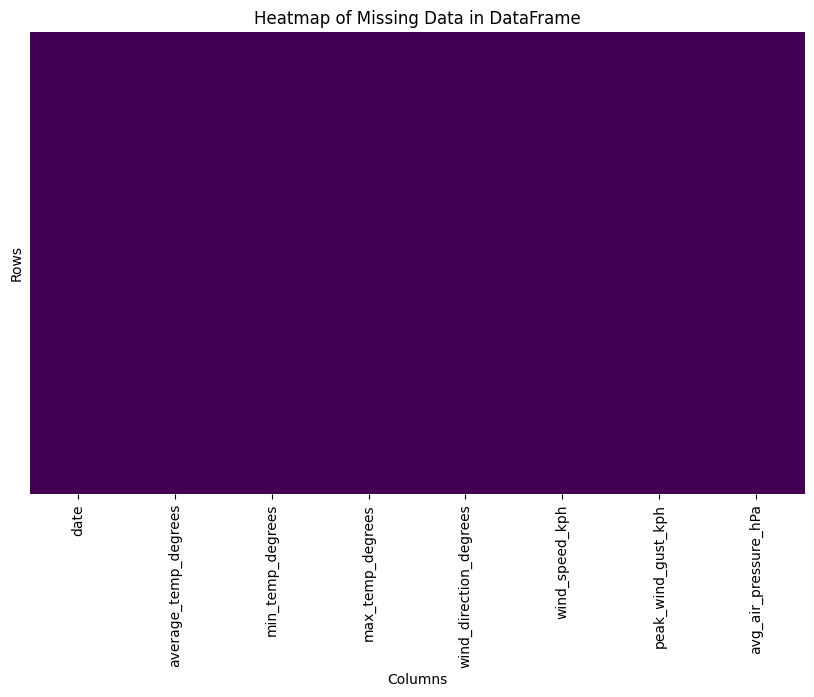

In [49]:
# Fill in null values by time interpolation

file_path = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Historical_Weather_Data.csv'
df = pd.read_csv(file_path)

# convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# set 'date' column as index
df.set_index('date', inplace=True)

# perform time-based interpolation
df.interpolate(method='time', inplace=True)

# reset index
df.reset_index(inplace=True)

# save the DataFrame to the same CSV file
df.to_csv(file_path, index=False)

plot_missing_data_heatmap(df)

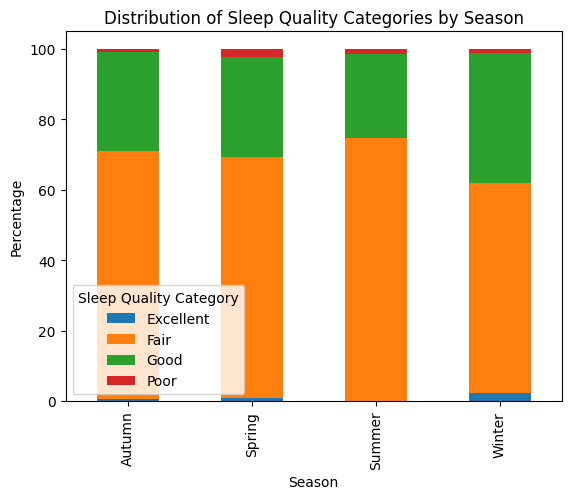

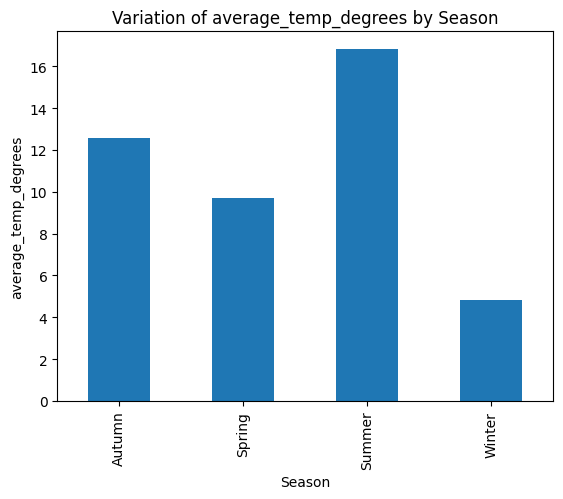

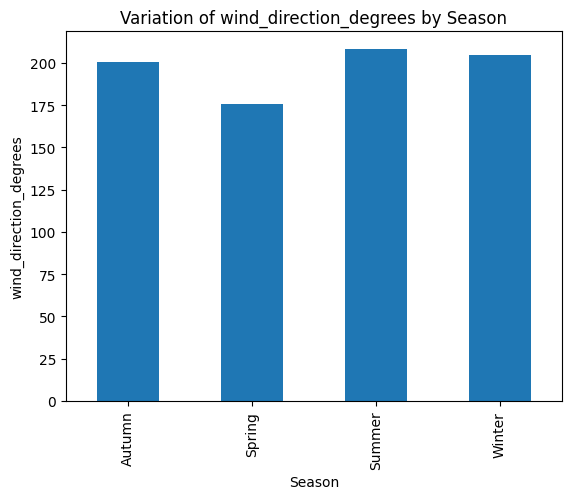

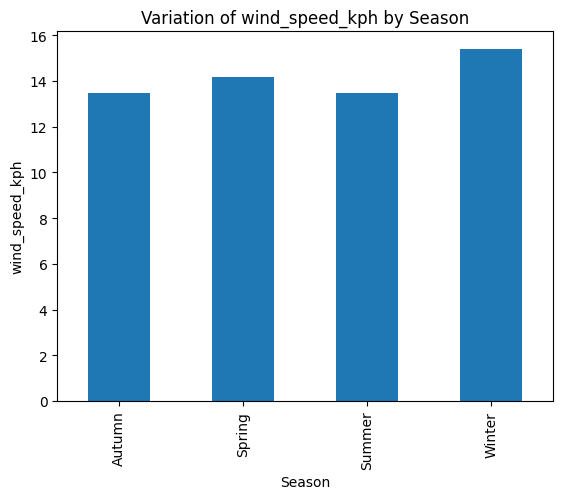

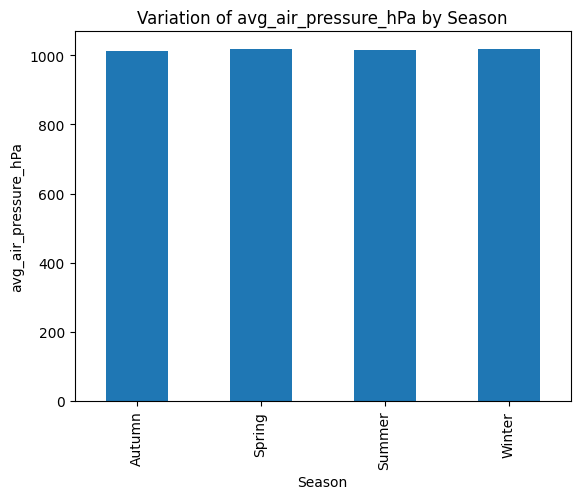

In [83]:
# Analysis

# read the historical weather data from the CSV file
file_path1 = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Historical_Weather_Data.csv'
df1 = pd.read_csv(file_path1)

# read the sleep predictor data from the CSV file
file_path2 = r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data2.csv'
df2 = pd.read_csv(file_path2)

# combine the day, month, year columns to form a 'date' column
df2['date'] = pd.to_datetime(df2[['year', 'month', 'day']])

def categorize_season(date):
    month = pd.to_datetime(date).month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# categorize the dates in df1 and df2 into seasons
df2['season'] = df2['date'].apply(categorize_season)
df1['season'] = df1['date'].apply(categorize_season)

# count the occurrences of each sleep_quality_category for each season
counts = df2.groupby(['season', 'sleep_quality_category']).size().reset_index(name='count')

# calculate the percentage of each sleep_quality_category for each season
total_counts = counts.groupby('season')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_counts * 100

# visualize the results using a stacked bar plot
pivot_counts = counts.pivot(index='season', columns='sleep_quality_category', values='percentage')
pivot_counts.plot(kind='bar', stacked=True)

# display the sleep quality plot
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Distribution of Sleep Quality Categories by Season')
plt.legend(title='Sleep Quality Category')
plt.show()

# extract and plot the variation of additional weather variables for each season
weather_variables = ['average_temp_degrees', 'wind_direction_degrees', 'wind_speed_kph', 'avg_air_pressure_hPa']
for variable in weather_variables:
    plt.figure()
    pivot_weather = df1.groupby('season')[variable].mean()
    pivot_weather.plot(kind='bar')
    plt.xlabel('Season')
    plt.ylabel(variable)
    plt.title(f'Variation of {variable} by Season')
    plt.show()
    
                                                                                        ,                                                                                                                                                                                                                                                                        i:-1#c

In [86]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\tobic\OneDrive\Desktop\Sleep Predictor Data\Tobi-Sleep-Predictor-Data3.csv')

# Calculate the correlation between weather data and sleep data
weather_features = ['average_temp_degrees', 'min_temp_degrees', 'max_temp_degrees', 'wind_direction_degrees', 'wind_speed_kph', 'peak_wind_gust_kph', 'avg_air_pressure_hPa']
sleep_data = 'duration_sleep_hours'  

correlations = df[weather_features + [sleep_data]].corr()

# Print the correlation between each weather feature and sleep data
for feature in weather_features:
    print(f'Correlation between {feature} and {sleep_data}: {correlations.loc[feature, sleep_data]}')

# The analysis here shows no correlation between the weather features and sleep duration.
    
# ----------------------------------------------------------------------

Correlation between average_temp_degrees and duration_sleep_hours: 0.06579028570765275
Correlation between min_temp_degrees and duration_sleep_hours: 0.05976969278877114
Correlation between max_temp_degrees and duration_sleep_hours: 0.06020399454660423
Correlation between wind_direction_degrees and duration_sleep_hours: -0.013513352874091979
Correlation between wind_speed_kph and duration_sleep_hours: -0.02669905239429888
Correlation between peak_wind_gust_kph and duration_sleep_hours: -0.010085020153405089
Correlation between avg_air_pressure_hPa and duration_sleep_hours: -0.02496778872759401
